In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data_sku_sales = pd.read_csv('data/sku_sales.csv')
data_sku_sales

,order_id,store_id,sku_id,order_time,quantity,channel
0,202108310100005,1,317,2021-08-31 00:00:05,1.0,2
1,202108310100023,1,317,2021-08-31 00:00:23,2.0,2
2,202204260100049,1,317,2022-04-26 00:00:49,2.0,2
3,202207040100048,1,317,2022-07-04 00:00:48,2.0,2
4,202207060100029,1,317,2022-07-06 00:00:29,1.0,2
...,...,...,...,...,...,...
16934240,202308260300510,3,652,2023-08-26 00:08:30,1.0,2
16934241,202308260500228,5,652,2023-08-26 00:03:48,1.0,2
16934242,202308261202716,12,652,2023-08-26 00:45:16,1.0,1
16934243,202308231201236,12,652,2023-08-23 00:20:36,1.0,1


In [5]:
temp = data_sku_sales['quantity']

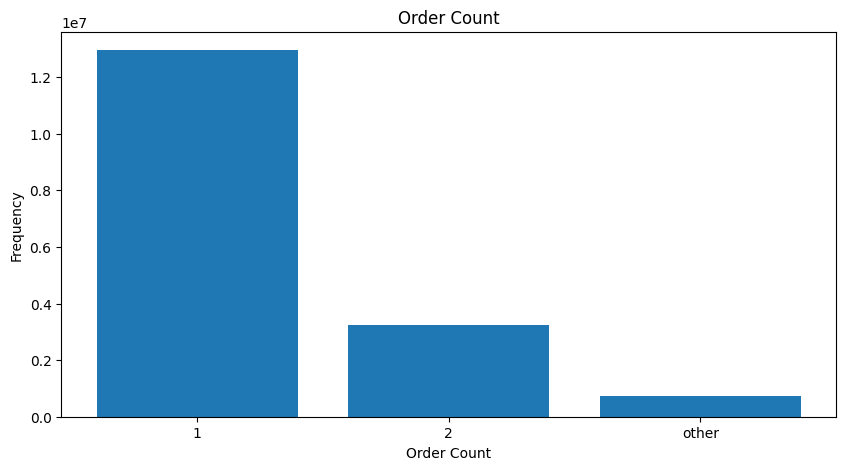

In [18]:
# 统计temp中1/2和其他的数量
count = temp.value_counts()
# 划分为三部分
count = count.sort_index()
count = {'1': count[1], '2': count[2], 'other': count.sum() - count[1] - count[2]}
# 画图
plt.figure(figsize=(10, 5))
plt.bar(count.keys(), count.values())
plt.title('Order Count')
plt.xlabel('Order Count')
plt.ylabel('Frequency')
plt.show()

In [35]:
# 筛选出那些不是整数的数据
not_int_sku_array = data_sku_sales[temp != temp.astype(int)]['sku_id'].unique()
not_int_sku_array

array([ 14, 259,  44, 442, 150, 449, 448, 443], dtype=int64)

In [56]:
data_sku_sales[data_sku_sales['sku_id'] == 14]

,order_id,store_id,sku_id,order_time,quantity,channel
2687376,202205310100001,1,14,2022-05-31 00:00:01,4.7,2
2687377,202206080100029,1,14,2022-06-08 00:00:29,6.0,2
2687378,202205070100125,1,14,2022-05-07 00:02:05,3.6,2
2687379,202205260100255,1,14,2022-05-26 00:04:15,4.3,2
2687380,202206220100107,1,14,2022-06-22 00:01:47,4.8,2
...,...,...,...,...,...,...
9925146,202305211201619,12,14,2023-05-21 00:26:59,4.2,1
9925147,202306301201533,12,14,2023-06-30 00:25:33,4.9,1
9925148,202307141201478,12,14,2023-07-14 00:24:38,9.5,1
9925149,202307221202350,12,14,2023-07-22 00:39:10,5.0,1


sku_id: 14, quantity_unique_count: 317
sku_id: 259, quantity_unique_count: 157
sku_id: 44, quantity_unique_count: 31
sku_id: 442, quantity_unique_count: 25
sku_id: 150, quantity_unique_count: 37
sku_id: 449, quantity_unique_count: 23
sku_id: 448, quantity_unique_count: 36
sku_id: 443, quantity_unique_count: 27


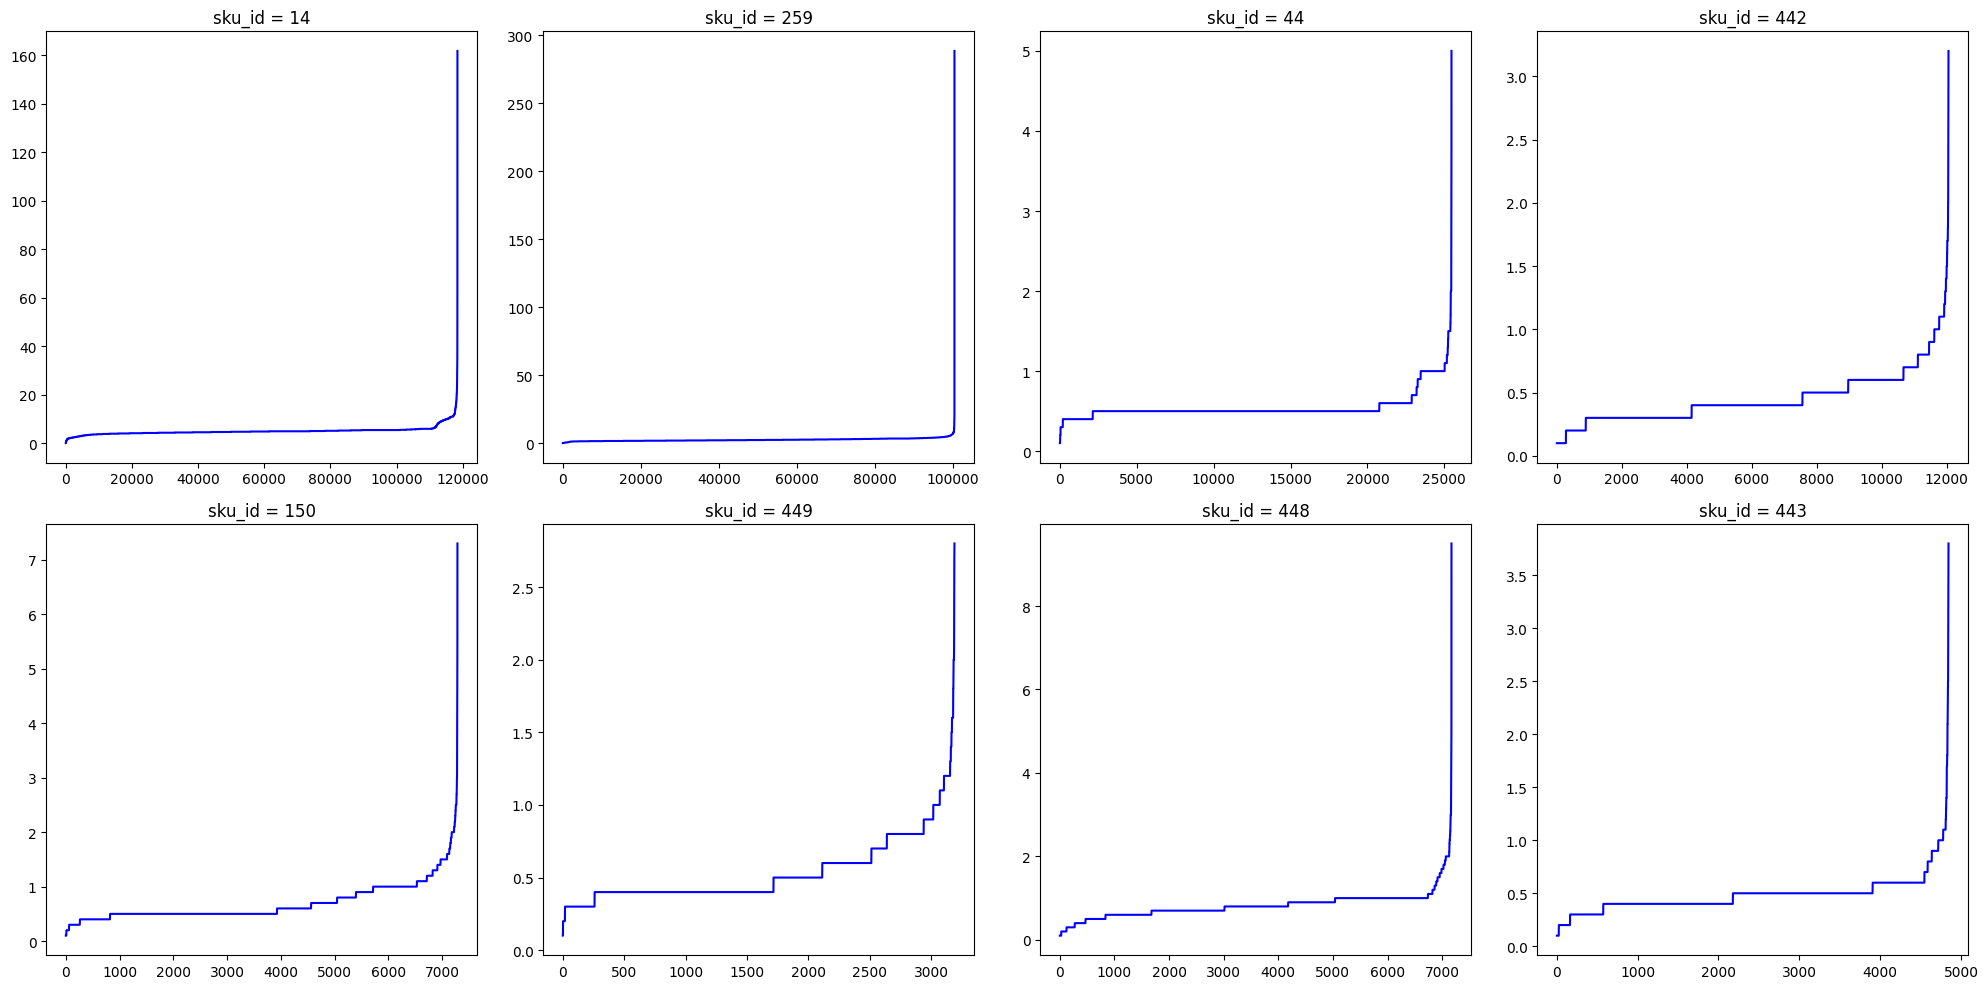

In [62]:
# 画一个2x4的图，包含八个子图
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
# 画出每个子图的内容
for i, sku_id in enumerate(not_int_sku_array): # [1,2,3,4,5,6,7,8]
    # 画出第i个子图：折线图
    single = data_sku_sales[data_sku_sales['sku_id'] == sku_id]['quantity'].copy().sort_values()
    print(f"sku_id: {sku_id}, quantity_unique_count: {single.unique().shape[0]}")
    axes[i // 4][i % 4].plot(range(single.shape[0]), single, color='blue')
    # 设置子图标题
    axes[i // 4][i % 4].set_title('sku_id = ' + str(sku_id))
# 调整子图间距
plt.tight_layout()
plt.show()

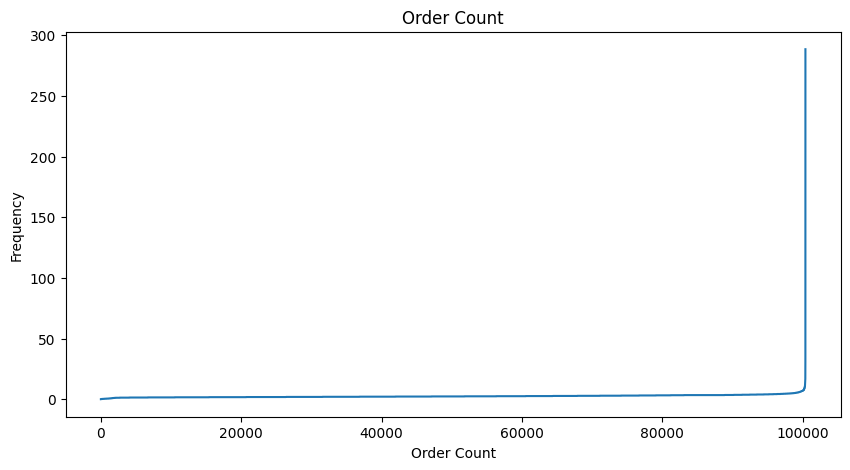

In [33]:
q = data_single['quantity']
q = q.sort_values()
# 画出折线图
plt.figure(figsize=(10, 5))
plt.plot(range(q.values.shape[0]), q.values)
plt.title('Order Count')
plt.xlabel('Order Count')
plt.ylabel('Frequency')
plt.show()

In [34]:
q.unique()

array([1.000e-01, 2.000e-01, 3.000e-01, 4.000e-01, 5.000e-01, 6.000e-01,
       7.000e-01, 8.000e-01, 9.000e-01, 1.000e+00, 1.100e+00, 1.200e+00,
       1.300e+00, 1.400e+00, 1.500e+00, 1.600e+00, 1.700e+00, 1.800e+00,
       1.900e+00, 2.000e+00, 2.100e+00, 2.200e+00, 2.300e+00, 2.400e+00,
       2.500e+00, 2.600e+00, 2.700e+00, 2.800e+00, 2.900e+00, 3.000e+00,
       3.100e+00, 3.200e+00, 3.300e+00, 3.400e+00, 3.500e+00, 3.600e+00,
       3.700e+00, 3.800e+00, 3.900e+00, 4.000e+00, 4.100e+00, 4.200e+00,
       4.300e+00, 4.400e+00, 4.500e+00, 4.600e+00, 4.700e+00, 4.800e+00,
       4.900e+00, 5.000e+00, 5.100e+00, 5.200e+00, 5.300e+00, 5.400e+00,
       5.500e+00, 5.600e+00, 5.700e+00, 5.800e+00, 5.900e+00, 6.000e+00,
       6.100e+00, 6.200e+00, 6.300e+00, 6.400e+00, 6.500e+00, 6.600e+00,
       6.700e+00, 6.800e+00, 6.900e+00, 7.000e+00, 7.100e+00, 7.200e+00,
       7.300e+00, 7.400e+00, 7.500e+00, 7.600e+00, 7.700e+00, 7.800e+00,
       7.900e+00, 8.000e+00, 8.100e+00, 8.200e+00, 

In [10]:
data_price = pd.read_csv('data/sku_price_and_status.csv')
data_price

,store_id,sku_id,date,salable_status,stock_status,original_price
0,6,1,2022-06-16,1,1,25.48
1,6,1,2023-04-08,1,1,25.48
2,6,1,2021-10-07,0,1,25.48
3,6,1,2021-12-25,0,1,25.48
4,6,1,2022-12-02,1,1,25.48
...,...,...,...,...,...,...
5104151,4,367,2023-08-17,1,1,17.28
5104152,4,367,2023-08-14,1,1,17.28
5104153,4,367,2023-08-15,1,1,17.28
5104154,4,367,2023-08-29,1,1,17.28


In [4]:
# 先把data_sku_sales中的order_time转化为date
data_sku_sales_date = data_sku_sales.copy()
data_sku_sales_date['order_time'] = pd.to_datetime(data_sku_sales_date['order_time'])
data_sku_sales_date['date'] = data_sku_sales_date['order_time'].dt.date
data_sku_sales_date

,order_id,store_id,sku_id,order_time,quantity,channel,date
0,202108310100005,1,317,2021-08-31 00:00:05,1.0,2,2021-08-31
1,202108310100023,1,317,2021-08-31 00:00:23,2.0,2,2021-08-31
2,202204260100049,1,317,2022-04-26 00:00:49,2.0,2,2022-04-26
3,202207040100048,1,317,2022-07-04 00:00:48,2.0,2,2022-07-04
4,202207060100029,1,317,2022-07-06 00:00:29,1.0,2,2022-07-06
...,...,...,...,...,...,...,...
16934240,202308260300510,3,652,2023-08-26 00:08:30,1.0,2,2023-08-26
16934241,202308260500228,5,652,2023-08-26 00:03:48,1.0,2,2023-08-26
16934242,202308261202716,12,652,2023-08-26 00:45:16,1.0,1,2023-08-26
16934243,202308231201236,12,652,2023-08-23 00:20:36,1.0,1,2023-08-23


In [5]:
# 统计不同sku_id, store_id, channel，date下的销量
data_stat = data_sku_sales_date.groupby(['sku_id', 'store_id', 'channel', 'date']).count()
data_stat = data_stat.reset_index()
data_stat

,sku_id,store_id,channel,date,order_id,order_time,quantity
0,1,1,1,2022-06-17,1,1,1
1,1,1,1,2022-06-18,4,4,4
2,1,1,1,2022-06-19,1,1,1
3,1,1,1,2022-06-24,1,1,1
4,1,1,1,2022-06-26,1,1,1
...,...,...,...,...,...,...,...
4130680,1000,12,1,2023-08-31,1,1,1
4130681,1000,12,2,2023-08-27,1,1,1
4130682,1000,12,2,2023-08-28,1,1,1
4130683,1000,12,2,2023-08-29,2,2,2


In [6]:
data_stat.drop(['order_time', 'quantity'], axis=1, inplace=True)
data_stat.rename(columns={'order_id': 'count'}, inplace=True)

In [39]:
data_single = data_stat[(data_stat['sku_id'] == 1) & (data_stat['store_id'] == 1) & (data_stat['channel'] == 1)].copy()
# 去掉sku_id, store_id, channel
data_single.drop(['sku_id', 'store_id', 'channel'], axis=1, inplace=True)
# 设置date为index
data_single.set_index('date', inplace=True)
# 将date填充为连续的日期
data_single = data_single.reindex(pd.date_range(data_single.index.min(), data_single.index.max()))
data_single

,count
2022-06-17,1.0
2022-06-18,4.0
2022-06-19,1.0
2022-06-20,NaN
2022-06-21,NaN
...,...
2023-08-26,3.0
2023-08-27,6.0
2023-08-28,2.0
2023-08-29,NaN


In [23]:
# 查找data_single每个nan对应的status是否为salable_status!=1或者stock_status!=0，如果是，则填充为0，否则填充为nan
temp = data_price[(data_price['sku_id'] == 1) & (data_price['store_id'] == 1)].copy()
temp['date'] = pd.to_datetime(temp['date'])
temp['date'] = temp['date'].dt.date
temp = temp[['date', 'salable_status', 'stock_status']]
temp.set_index('date', inplace=True)
temp = temp.reindex(pd.date_range(data_single.index.min(), data_single.index.max()))
temp

,salable_status,stock_status
2022-06-17,1,1
2022-06-18,1,1
2022-06-19,1,1
2022-06-20,1,0
2022-06-21,1,0
...,...,...
2023-08-26,1,1
2023-08-27,1,1
2023-08-28,1,1
2023-08-29,1,1


In [40]:
data_single['status'] = (temp['salable_status'] == 1) | (temp['stock_status'] != 0)
data_single['count'] = data_single.loc[data_single['status'] == True, 'count'].fillna(0)
data_single.drop('status', axis=1, inplace=True)
data_single.fillna(-1, inplace=True)
data_single

,count
2022-06-17,1.0
2022-06-18,4.0
2022-06-19,1.0
2022-06-20,0.0
2022-06-21,0.0
...,...
2023-08-26,3.0
2023-08-27,6.0
2023-08-28,2.0
2023-08-29,0.0


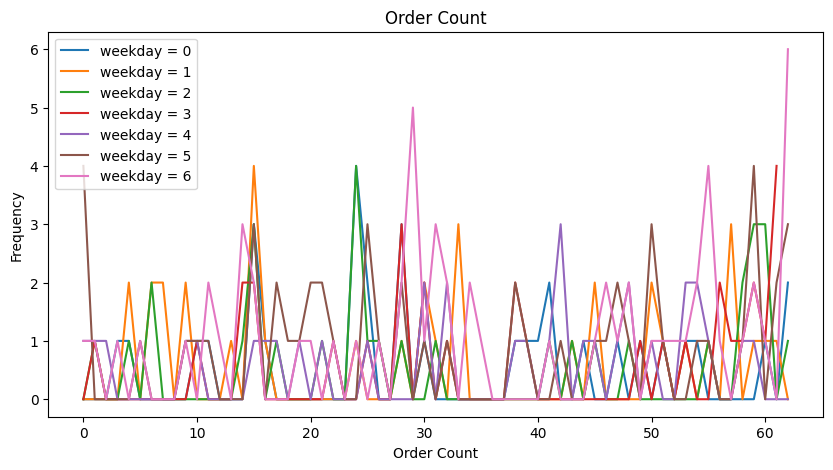

In [47]:
# 在一个图中画出七个折线图，表示不同weekday的销量
plt.figure(figsize=(10, 5))
for i in range(7):
    temp = data_single[data_single.index.weekday == i]['count']
    plt.plot(range(temp.shape[0]), temp, label='weekday = ' + str(i))
plt.legend()
plt.title('Order Count')
plt.xlabel('Order Count')
plt.ylabel('Frequency')
plt.show()

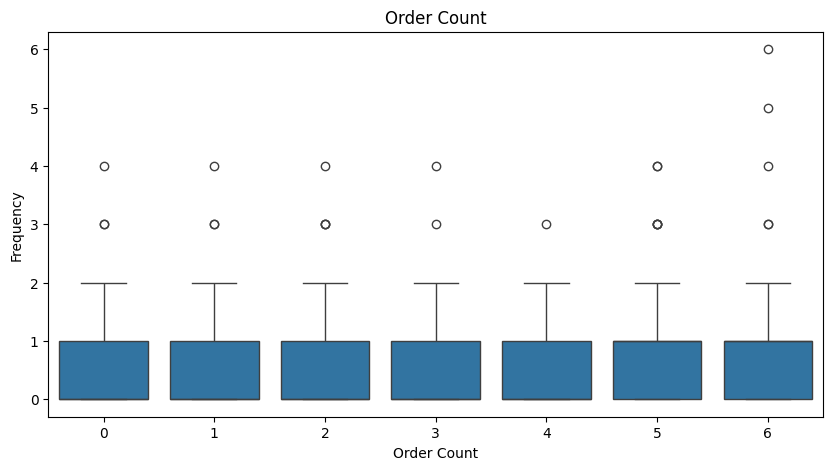

In [48]:
# 画出一个箱型图，表示不同weekday的销量
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_single.index.weekday, y=data_single['count'])
plt.title('Order Count')
plt.xlabel('Order Count')
plt.ylabel('Frequency')
plt.show()

In [59]:
# 统计所有weekday的平均销量
temp = data_single.groupby(data_single.index.weekday).mean()
temp

,count
0,0.507937
1,0.571429
2,0.507937
3,0.500000
4,0.539683
5,0.841270
6,0.984127


In [57]:
# 统计每周的销量，而不是每个weekday的销量
data_single_week = data_single.copy()
# AttributeError: 'DatetimeIndex' object has no attribute 'week'
# data_single_week['week'] = data_single_week.index.week
# AttributeError: 'DatetimeIndex' object has no attribute 'weekofyear'
# data_single_week['week'] = data_single_week.index.weekofyear
data_single_week['week'] = data_single_week.index.isocalendar().year.astype(str) + '-' + data_single_week.index.isocalendar().week.astype(str)
data_single_week = data_single_week.groupby('week').sum()
data_single_week

,count
week,
2022-24,6.0
2022-25,2.0
2022-26,3.0
2022-27,1.0
2022-28,1.0
...,...
2023-5,1.0
2023-6,5.0
2023-7,1.0


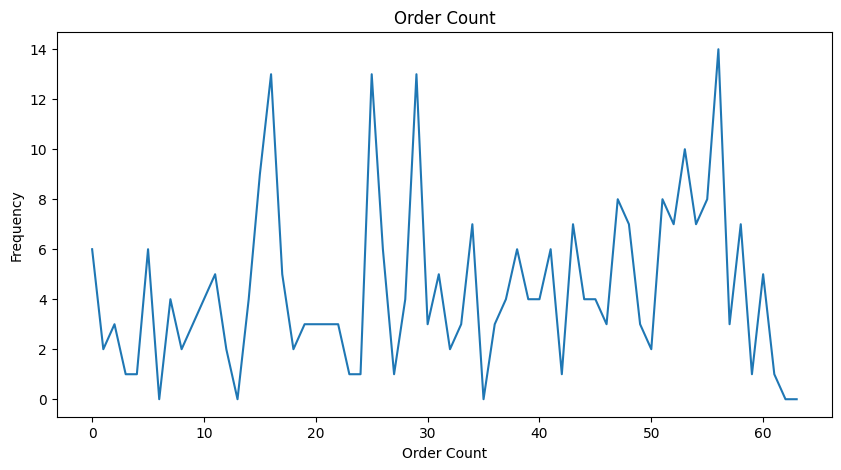

In [58]:
# 画出每周的销量
plt.figure(figsize=(10, 5))
plt.plot(range(data_single_week.shape[0]), data_single_week['count'])
plt.title('Order Count')
plt.xlabel('Order Count')
plt.ylabel('Frequency')
plt.show()

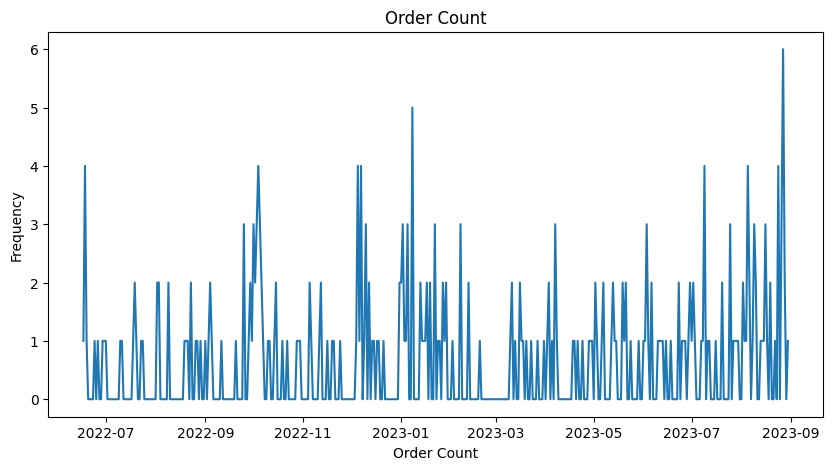

In [41]:
# 对date排序后画图
# data_single = data_single.sort_values(by='date')
# 画出折线图
plt.figure(figsize=(10, 5))
plt.plot(data_single.index, data_single['count'])
plt.title('Order Count')
plt.xlabel('Order Count')
plt.ylabel('Frequency')
plt.show()

In [20]:
data_single

,count,status
2022-06-17,1.0,True
2022-06-18,4.0,True
2022-06-19,1.0,True
2022-06-20,NaN,True
2022-06-21,NaN,True
...,...,...
2023-08-26,3.0,True
2023-08-27,6.0,True
2023-08-28,2.0,True
2023-08-29,NaN,True


In [60]:
data_store_weather = pd.read_csv('data/store_weather.csv')
data_store_weather

,store_id,date,weather_type,min_temperature,max_temperature
0,3,2022-01-30,14,0.20,0.31
1,3,2022-04-13,1,0.36,0.60
2,3,2022-07-17,0,0.67,0.91
3,3,2022-08-23,7,0.64,0.76
4,3,2022-12-17,1,0.05,0.22
...,...,...,...,...,...
8142,12,2023-04-06,0,0.35,0.58
8143,12,2022-10-10,0,0.31,0.58
8144,12,2023-01-20,0,0.09,0.24
8145,12,2023-04-12,0,0.45,0.65


In [61]:
# 检查对于每个store_id，是否有date是缺失的
data_store_weather.groupby('store_id').agg({'date': lambda x: pd.date_range(x.min(), x.max()).shape[0] - x.unique().shape[0]})

,date
store_id,
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [111]:
data_sku_sales['date'] = pd.to_datetime(data_sku_sales['order_time'])
data_sku_sales['date'] = data_sku_sales['date'].dt.date
data_sku_sales = data_sku_sales.groupby(['store_id', 'sku_id', 'date', 'channel']).count().reset_index()
data_sku_sales = data_sku_sales[['store_id', 'sku_id', 'date', 'channel', 'order_id']].reset_index()
data_sku_sales.rename(columns={'order_id': 'count'}, inplace=True)
data_sku_sales.drop("index", axis=1, inplace=True)
data_sku_sales

,store_id,sku_id,date,channel,count
0,1,1,2022-05-23,2,1
1,1,1,2022-05-28,2,3
2,1,1,2022-05-29,2,2
3,1,1,2022-05-30,2,1
4,1,1,2022-05-31,2,1
...,...,...,...,...,...
4130680,12,1000,2023-08-27,2,1
4130681,12,1000,2023-08-28,2,1
4130682,12,1000,2023-08-29,2,2
4130683,12,1000,2023-08-31,1,1


In [112]:
# 将近一个月的数据，按照每周进行划分
pred_start_date = pd.to_datetime('2023-09-01').date()
pred_end_date = pd.to_datetime('2023-09-14').date()

In [113]:
data_sku_sales_month = data_sku_sales[data_sku_sales['date'] >= pd.to_datetime("2023-08-01").date()].copy()
data_sku_sales_month

,store_id,sku_id,date,channel,count
298,1,1,2023-08-02,1,2
299,1,1,2023-08-03,1,1
300,1,1,2023-08-04,1,1
301,1,1,2023-08-05,1,4
302,1,1,2023-08-06,1,2
...,...,...,...,...,...
4130680,12,1000,2023-08-27,2,1
4130681,12,1000,2023-08-28,2,1
4130682,12,1000,2023-08-29,2,2
4130683,12,1000,2023-08-31,1,1


In [114]:
# 统计weekday的平均订单量
data_sku_sales_month['weekday'] = data_sku_sales_month['date'].apply(lambda x: x.weekday())
data_sku_sales_month = data_sku_sales_month.groupby(['store_id', 'sku_id', 'channel', 'weekday']).agg({'count': 'max'}).reset_index()
data_sku_sales_month

,store_id,sku_id,channel,weekday,count
0,1,1,1,0,2
1,1,1,1,1,1
2,1,1,1,2,3
3,1,1,1,3,4
4,1,1,1,4,1
...,...,...,...,...,...
130601,12,1000,1,6,1
130602,12,1000,2,0,1
130603,12,1000,2,1,2
130604,12,1000,2,3,2


In [115]:
# store_id从1-12，sku_id从1-1000，order_time从2023-08-18到2023-08-31
store_ids = list(range(1, 13))
sku_ids = list(range(1, 1001))
dates = pd.date_range('2023-09-01', '2023-09-14').date

# 生成store_id, sku_id, order_time的笛卡尔积
cartesian = pd.MultiIndex.from_product([store_ids, sku_ids, dates], names=['store_id', 'sku_id', 'date'])
data_now_stocks = pd.DataFrame(cartesian.to_frame(), columns=['store_id', 'sku_id', 'date']).reset_index(drop=True)
data_now_stocks['weekday'] = data_now_stocks['date'].apply(lambda x: x.weekday())
data_now_stocks

,store_id,sku_id,date,weekday
0,1,1,2023-09-01,4
1,1,1,2023-09-02,5
2,1,1,2023-09-03,6
3,1,1,2023-09-04,0
4,1,1,2023-09-05,1
...,...,...,...,...
167995,12,1000,2023-09-10,6
167996,12,1000,2023-09-11,0
167997,12,1000,2023-09-12,1
167998,12,1000,2023-09-13,2


In [116]:
temp = pd.merge(data_now_stocks, data_sku_sales_month[data_sku_sales_month["channel"] == 1], on=['store_id', 'sku_id', 'weekday'], how='left')
temp.rename(columns={'count': 'num_k'}, inplace=True)
temp = pd.merge(temp, data_sku_sales_month[data_sku_sales_month["channel"] == 2], on=['store_id', 'sku_id', 'weekday'], how='left')
temp.rename(columns={'count': 'num_m'}, inplace=True)
temp.drop(['weekday', 'channel_x', 'channel_y'], axis=1, inplace=True)
temp

,store_id,sku_id,date,num_k,num_m
0,1,1,2023-09-01,1.0,NaN
1,1,1,2023-09-02,4.0,NaN
2,1,1,2023-09-03,6.0,1.0
3,1,1,2023-09-04,2.0,1.0
4,1,1,2023-09-05,1.0,NaN
...,...,...,...,...,...
167995,12,1000,2023-09-10,1.0,1.0
167996,12,1000,2023-09-11,NaN,1.0
167997,12,1000,2023-09-12,NaN,2.0
167998,12,1000,2023-09-13,NaN,NaN


In [117]:
temp.fillna(0, inplace=True)
temp

,store_id,sku_id,date,num_k,num_m
0,1,1,2023-09-01,1.0,0.0
1,1,1,2023-09-02,4.0,0.0
2,1,1,2023-09-03,6.0,1.0
3,1,1,2023-09-04,2.0,1.0
4,1,1,2023-09-05,1.0,0.0
...,...,...,...,...,...
167995,12,1000,2023-09-10,1.0,1.0
167996,12,1000,2023-09-11,0.0,1.0
167997,12,1000,2023-09-12,0.0,2.0
167998,12,1000,2023-09-13,0.0,0.0


In [118]:
# temp["num_k"] = np.ceil(temp["num_k"])
# temp["num_m"] = np.ceil(temp["num_m"])
# temp

In [119]:
temp.to_csv("data/test/pred_order_num.csv", index=False)

In [120]:
data_sku_sales = pd.read_csv('data/sku_sales.csv')
data_sku_sales

,order_id,store_id,sku_id,order_time,quantity,channel
0,202108310100005,1,317,2021-08-31 00:00:05,1.0,2
1,202108310100023,1,317,2021-08-31 00:00:23,2.0,2
2,202204260100049,1,317,2022-04-26 00:00:49,2.0,2
3,202207040100048,1,317,2022-07-04 00:00:48,2.0,2
4,202207060100029,1,317,2022-07-06 00:00:29,1.0,2
...,...,...,...,...,...,...
16934240,202308260300510,3,652,2023-08-26 00:08:30,1.0,2
16934241,202308260500228,5,652,2023-08-26 00:03:48,1.0,2
16934242,202308261202716,12,652,2023-08-26 00:45:16,1.0,1
16934243,202308231201236,12,652,2023-08-23 00:20:36,1.0,1


In [121]:
# 对store_id，sku_id，channel分组，统计quantity
data_sku_sales = data_sku_sales.groupby(['store_id', 'sku_id', 'channel'])['quantity'].mean().reset_index()
data_sku_sales

,store_id,sku_id,channel,quantity
0,1,1,1,1.103571
1,1,1,2,1.203774
2,1,2,1,1.204360
3,1,2,2,1.368027
4,1,3,1,1.232352
...,...,...,...,...
23634,12,998,2,1.000000
23635,12,999,1,1.120000
23636,12,999,2,1.230769
23637,12,1000,1,1.000000


In [122]:
# 将channel=1和2的分为两个dataframe
data_sku_sales_k = data_sku_sales[data_sku_sales['channel'] == 1].copy()
data_sku_sales_m = data_sku_sales[data_sku_sales['channel'] == 2].copy()
data_sku_sales_k.drop('channel', axis=1, inplace=True)
data_sku_sales_m.drop('channel', axis=1, inplace=True)
data_sku_sales_k.rename(columns={'quantity': 'quantity_k'}, inplace=True)
data_sku_sales_m.rename(columns={'quantity': 'quantity_m'}, inplace=True)
sales_temp = pd.merge(data_sku_sales_k, data_sku_sales_m, on=['store_id', 'sku_id'], how='outer')

In [123]:
sales_temp.fillna(0, inplace=True)
sales_temp

,store_id,sku_id,quantity_k,quantity_m
0,1,1,1.103571,1.203774
1,1,2,1.204360,1.368027
2,1,3,1.232352,1.431710
3,1,4,1.288210,1.915842
4,1,5,1.327241,1.702492
...,...,...,...,...
11937,11,979,0.000000,1.000000
11938,11,988,0.000000,1.153846
11939,11,997,0.000000,1.000000
11940,12,522,0.000000,1.157895


In [124]:
# 将temp和sales_temp合并
temp = pd.merge(temp, sales_temp, on=['store_id', 'sku_id'], how='left')
temp.fillna(0, inplace=True)
temp

,store_id,sku_id,date,num_k,num_m,quantity_k,quantity_m
0,1,1,2023-09-01,1.0,0.0,1.103571,1.203774
1,1,1,2023-09-02,4.0,0.0,1.103571,1.203774
2,1,1,2023-09-03,6.0,1.0,1.103571,1.203774
3,1,1,2023-09-04,2.0,1.0,1.103571,1.203774
4,1,1,2023-09-05,1.0,0.0,1.103571,1.203774
...,...,...,...,...,...,...,...
167995,12,1000,2023-09-10,1.0,1.0,1.000000,1.000000
167996,12,1000,2023-09-11,0.0,1.0,1.000000,1.000000
167997,12,1000,2023-09-12,0.0,2.0,1.000000,1.000000
167998,12,1000,2023-09-13,0.0,0.0,1.000000,1.000000


In [125]:
temp['x_k'] = np.ceil(temp['num_k'] * temp['quantity_k'])
temp['x_m'] = np.ceil(temp['num_m'] * temp['quantity_m'])
temp

,store_id,sku_id,date,num_k,num_m,quantity_k,quantity_m,x_k,x_m
0,1,1,2023-09-01,1.0,0.0,1.103571,1.203774,2.0,0.0
1,1,1,2023-09-02,4.0,0.0,1.103571,1.203774,5.0,0.0
2,1,1,2023-09-03,6.0,1.0,1.103571,1.203774,7.0,2.0
3,1,1,2023-09-04,2.0,1.0,1.103571,1.203774,3.0,2.0
4,1,1,2023-09-05,1.0,0.0,1.103571,1.203774,2.0,0.0
...,...,...,...,...,...,...,...,...,...
167995,12,1000,2023-09-10,1.0,1.0,1.000000,1.000000,1.0,1.0
167996,12,1000,2023-09-11,0.0,1.0,1.000000,1.000000,0.0,1.0
167997,12,1000,2023-09-12,0.0,2.0,1.000000,1.000000,0.0,2.0
167998,12,1000,2023-09-13,0.0,0.0,1.000000,1.000000,0.0,0.0


In [126]:
temp.drop(["num_k", "num_m", "quantity_k", "quantity_m"], axis=1, inplace=True)
temp

,store_id,sku_id,date,x_k,x_m
0,1,1,2023-09-01,2.0,0.0
1,1,1,2023-09-02,5.0,0.0
2,1,1,2023-09-03,7.0,2.0
3,1,1,2023-09-04,3.0,2.0
4,1,1,2023-09-05,2.0,0.0
...,...,...,...,...,...
167995,12,1000,2023-09-10,1.0,1.0
167996,12,1000,2023-09-11,0.0,1.0
167997,12,1000,2023-09-12,0.0,2.0
167998,12,1000,2023-09-13,0.0,0.0


In [127]:
tcond = temp["x_k"] == 0
temp.loc[tcond, "x_k"] = temp.loc[tcond, "x_m"]
temp.loc[tcond, "x_m"] = 0

In [128]:
temp

,store_id,sku_id,date,x_k,x_m
0,1,1,2023-09-01,2.0,0.0
1,1,1,2023-09-02,5.0,0.0
2,1,1,2023-09-03,7.0,2.0
3,1,1,2023-09-04,3.0,2.0
4,1,1,2023-09-05,2.0,0.0
...,...,...,...,...,...
167995,12,1000,2023-09-10,1.0,1.0
167996,12,1000,2023-09-11,1.0,0.0
167997,12,1000,2023-09-12,2.0,0.0
167998,12,1000,2023-09-13,0.0,0.0


In [129]:
# 对于同样的date和store：x_m最多的200个保留x_m，其他的x_k=x_k+x_m, x_m=0
temp = temp.sort_values(by=['date', 'store_id', 'x_m'], ascending=False)
t1 = temp.groupby(['date', 'store_id']).head(100)
t1

,store_id,sku_id,date,x_k,x_m
156253,12,161,2023-09-14,101.0,172.0
154153,12,11,2023-09-14,107.0,134.0
154195,12,14,2023-09-14,282.0,134.0
157807,12,272,2023-09-14,58.0,68.0
157639,12,260,2023-09-14,31.0,64.0
...,...,...,...,...,...
12166,1,870,2023-09-01,14.0,8.0
280,1,21,2023-09-01,3.0,7.0
392,1,29,2023-09-01,3.0,7.0
770,1,56,2023-09-01,4.0,7.0


In [130]:
t2 = temp.groupby(['date', 'store_id']).tail(900)
t2

,store_id,sku_id,date,x_k,x_m
154125,12,9,2023-09-14,19.0,14.0
155567,12,112,2023-09-14,12.0,14.0
155791,12,128,2023-09-14,40.0,14.0
155889,12,135,2023-09-14,7.0,14.0
157695,12,264,2023-09-14,9.0,14.0
...,...,...,...,...,...
13916,1,995,2023-09-01,0.0,0.0
13930,1,996,2023-09-01,0.0,0.0
13944,1,997,2023-09-01,2.0,0.0
13958,1,998,2023-09-01,1.0,0.0


In [131]:
t2['x_k'] = t2['x_k'] + t2['x_m']
t2['x_m'] = 0
t2

C:\Users\Yipeng\AppData\Local\Temp\ipykernel_16904\3622977218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['x_k'] = t2['x_k'] + t2['x_m']
C:\Users\Yipeng\AppData\Local\Temp\ipykernel_16904\3622977218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['x_m'] = 0


,store_id,sku_id,date,x_k,x_m
154125,12,9,2023-09-14,33.0,0
155567,12,112,2023-09-14,26.0,0
155791,12,128,2023-09-14,54.0,0
155889,12,135,2023-09-14,21.0,0
157695,12,264,2023-09-14,23.0,0
...,...,...,...,...,...
13916,1,995,2023-09-01,0.0,0
13930,1,996,2023-09-01,0.0,0
13944,1,997,2023-09-01,2.0,0
13958,1,998,2023-09-01,1.0,0


In [132]:
# 合并t1和t2
temp = pd.concat([t1, t2])
temp

,store_id,sku_id,date,x_k,x_m
156253,12,161,2023-09-14,101.0,172.0
154153,12,11,2023-09-14,107.0,134.0
154195,12,14,2023-09-14,282.0,134.0
157807,12,272,2023-09-14,58.0,68.0
157639,12,260,2023-09-14,31.0,64.0
...,...,...,...,...,...
13916,1,995,2023-09-01,0.0,0.0
13930,1,996,2023-09-01,0.0,0.0
13944,1,997,2023-09-01,2.0,0.0
13958,1,998,2023-09-01,1.0,0.0


In [133]:
temp.sort_values(by=['date', 'store_id', 'sku_id'], inplace=True)

In [134]:
temp

,store_id,sku_id,date,x_k,x_m
0,1,1,2023-09-01,2.0,0.0
14,1,2,2023-09-01,7.0,0.0
28,1,3,2023-09-01,9.0,0.0
42,1,4,2023-09-01,5.0,0.0
56,1,5,2023-09-01,25.0,0.0
...,...,...,...,...,...
167943,12,996,2023-09-14,5.0,0.0
167957,12,997,2023-09-14,3.0,0.0
167971,12,998,2023-09-14,0.0,0.0
167985,12,999,2023-09-14,6.0,0.0


In [135]:
# 浮点数保留两位小数
temp.to_csv("data/test/test_results.csv", index=False, float_format='%.2f')